In [3]:
import os
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ'

In [4]:
os.chdir("C:\\Users\\LENOVO\\Desktop\\PYTHON\\VERİ BİLİMİ\\bootcamp_ödev_finans_verisi")

In [5]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
!pip install researchpy
import researchpy as rp

# Verisetine İlk Bakışı Atmamızı Sağlayacak Olan Class

In [ ]:
class Information():
    def __init__(self,data):
        self.data = data
        
    
    def info(self):
        print(data.info())
        
    
    def copy(self):
        data1 = data.copy()
        data2 = data.copy()
    
    def describe(self):
        
        return data.describe()
        
    def shape(self):
        
        #type(data)
        print(data.axes)
        #print(self.data.axes)
        #print(" ndim = " + str(data.ndim))
        print(" Veri şekli = " + str(data.shape))
        print(" Veri büyüklüğü = " + str(data.size))
        #type(data.values)
    
    def head(self,row = None):
        
        return data.head(5)
        # print(data.tail(3))
        
    def hedef_degisken(self):
        
        print("**********************************")
        print(" 90_target Değişkeninin incelenmesi")
        print("Ortalama: " + str(data["90_target"].mean()))
        print("Dolu Gözlem Sayısı: " + str(data["90_target"].count())) 
        print("Maksimum Değer: " + str(data["90_target"].max()))
        print("Minimum Değer: " + str(data["90_target"].min()))
        print("Medyan: " + str(data["90_target"].median()))
        print("Standart Sapma: " + str(data["90_target"].std()))

# VERİ GÖRSELLEŞTİRME

### Bu class içerisinde incelemek istediğimiz değişkenleri görselleştirerek daha yakından tanıma fırsatı buluyoruz.

In [6]:
class Visualization():
    def __init__(self,data):
        self.data = data
        
    def visual(self):
        data["ind_109"].value_counts().plot.barh().set_title("Job Değişkeninin Sınıf Frekansları");
    
    def countplot(self):
        sns.countplot(x="ind_109", data=data, palette="bwr")
        plt.show()
        
    def probplot(self):
        
        import statsmodels.api as sm
        import pylab
        import scipy.stats as stats
        stats.probplot(data["ind_18"],dist = "norm" , plot = pylab) # normal probability plot
        pylab.show()
        
    def scatterplot(self):
        data.plot.scatter("90_target","ind_18");
        
    def distplot(self):
        sns.distplot(data["90_target"], kde = False);
        
    def pairplot(self):
        
        #sns.pairplot(data);
        pass
        
    def pivotTable(self):
        
        # print(data.pivot_table("...",index = "...",columns = "..."))
        
        pass

# İSTATİSTİK

In [7]:
class stats():
    def __init__(self,data):
        self.data = data
        
    def imports(self):
        
        import scipy.stats as stats
        import statsmodels.stats.api as sms
        import pylab
        from scipy.stats.stats import pearsonr
        import researchpy as rp
        
    
    def table(self):
        
        print(rp.summary_cont(data[["ind_5","ind_6"]])) 
        
        print("*******************************")
        
        print(rp.summary_cat(data["ind_109"]))
        
        print("*******************************")
        
       
        
    def shapiro(self):
        
        import scipy.stats as stats
        from scipy.stats import shapiro
        test, p_value = shapiro(data["90_target"])
        
        print("Varsayım kontrolünde pvalue = " + str(p_value))
        
        
        if p_value > 0.05:
            print("Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. yoktur.")
        else:
            print("Örnek dağılımı ile teorik normal dağılım arasında ist. ol. anl. bir fark. vardır.")
        
        test_istatistigi, pvalue = stats.ttest_1samp(data["90_target"], popmean = 10000)
        print("pvalue = " + str(pvalue))
        
        if pvalue > 0.05 :
            print("H0 hipotezimiz reddedilemez.")
        else:
            print("H0 hipotezimiz reddelir.")   
        
        
        
    def qqplot(self):
        import pylab
        import scipy.stats as stats
        stats.probplot(data["90_target"], dist="norm", plot=pylab)
        pylab.show()
        
    def korelasyon_analiz(self):
        
        
        data.plot.scatter("90_target","ind_424");

        print(data["90_target"].corr(data["ind_424"])) # parametrik karşılığı
        
        # Hedef değişken 90_target için analiz
        
        print(data.corr()['90_target'].abs().sort_values(ascending=False))
        
        
    def korelasyon_map(self):
        
        corr = data.corr()
        # print(corr)
        # sns.heatmap(corr, 
        #xticklabels=corr.columns.values,
        #yticklabels=corr.columns.values)
        
        fig,ax = plt.subplots(figsize=(15, 15))
        sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        plt.show()

In [250]:
class PreProcessing():
    def __init__(self,data):
        self.data = data
        
    
    def copy_data(self):
        
        data2 = data.copy()
        data3 = data.copy()
        
    def outlier(self):
        
        t_data = data.dropna() # Eksik gözlemleri sildik. Aykırı gözlemleri rahatça görebilmek için.
        print(t_data.head())
        
        # Bir tane gözlemimi alıyorum.
        data_target = t_data["90_target"]
        sns.boxplot(x = data_target);
        
        Q1 = data_target.quantile(0.25)
        Q3 = data_target.quantile(0.75)
        IQR = Q3-Q1
       
        
        print(" IQR = " + str(Q3-Q1))
        print(" Alt Sınır = " + str(Q1- 1.5*IQR))
        print(" Üst Sınır = " + str(Q3 + 1.5*IQR))
        print(data_target.median())
       
        # Daha sonra aykırı değeri Baskılama ve ya Ortalama yöntemi ile doldurma işlemleri
    
    def MissingValue(self):
        
        print(data.isnull().sum())
        #print(data.isnull())
        #print(data[data.isnull().any(axis = 1)]) # Eksik değer olan satırlara erişmek
        
        # Bir gözlemi örnek alıyorum.
        # data["loan"]
        # data["loan"].mean()
        # print(data["loan"].fillna(data["loan"].mean())) # fillna doldurma işlemi için yapılıyor.
        
        # data.isna().values.any() #Kalan NaN değeri var mı kontrol etmek için
     
    def dropNa(self):
        data.dropna(inplace = True) # tüm eksik gözlemlerin silinmesi
        return data.isnull().sum()     
    
    def fillna(self):
        
        self.X.fillna(self.X.mean()[:],inplace = True) # eksik değerleri ortalama yöntemi ile doldurma
        
        # kategorik
        
        print(" En sık tekrarlanan değişken:" + str(self.X["ind_109_GREEN"].mode()[0]))
        self.X["ind_109_GREEN"].fillna(self.X["ind_109_GREEN"].mode()[0],inplace = True)
        print(" En sık tekrarlanan değişken:" + str(self.X["ind_109_RED"].mode()[0]))
        self.X["ind_109_RED"].fillna(self.X["ind_109_RED"].mode()[0],inplace = True)
        self.X = data.drop(["ind_109"],axis =1)
        return data.head()
        
    def scale(self):
        from sklearn.preprocessing import StandardScaler  
        scaler = StandardScaler()
        scaler.fit(self.X_train)
        self.X_train_scaled = scaler.transform(self.X_train)
        self.X_test_scaled = scaler.transform(self.X_test)
        
    
    def normalize(self):
        
        from sklearn import preprocessing
        preprocessing.normalize(self.X)
        
        
    def dummies(self):
        
        # Veri setinin hikayesini bilmediğim için şimdilik object değişkenleri siliyorum.
        # Bu object değişkenler önemli değişkenler de olabilir.

        
        cat = pd.get_dummies(data[['ind_109']])
        self.y = data["90_target"]
        
        self.X = pd.concat([data, cat[["ind_109_GREEN","ind_109_RED"]]])
        return self.X.head(3)
        
        
    def onhazirlik(self): # burada DUMMIES yapmazsak modele sokulacak target değişken ve çıkarılması gereken değişkenler 
        
        self.X = self.X.dropna(inplace = True)
        self.y = data["90_target"]
        self.X = data.drop(["90_target","50_target","20_target","ind_109","ind_420","ind_422"],axis = 1)
        
        return self.X.head(3)
        
        
    
    
    def train_test_split(self):
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, 
                                                                                test_size = 0.20,
                                                                                random_state = 42)
    
    
    def pca(self):
        
        from sklearn.linear_model import LinearRegression
        
        from sklearn.decomposition import PCA
        from sklearn.preprocessing import scale 
        self.pca = PCA(4)
        self.X_reduced_train = self.pca.fit_transform(scale(self.X_train))
        self.X_reduced_test = self.pca.fit_transform(scale(self.X_test))
        
        import matplotlib.pyplot as plt
        features = range(self.pca.n_components_)
        plt.figure(figsize=(20,15))
        plt.bar(features, self.pca.explained_variance_ratio_, color = 'black')
        plt.xlabel('PCA Features')
        plt.ylabel('variance%')
        # plt.xticks(features)
        
        self.lm = LinearRegression()
        self.pcr_model = self.lm.fit(self.X_reduced_train, self.y_train)
        
        from sklearn.metrics import mean_squared_error, r2_score
        
        self.y_pred = self.pcr_model.predict(self.X_reduced_train)
        self.pcr_rmse_train = np.sqrt(mean_squared_error(self.y_train, self.y_pred))
        print(" TRAIN PCR RMSE:"+ str(self.pcr_rmse_train))
        
        self.y_pred_test = self.pcr_model.predict(self.X_reduced_test)
        self.pcr_rmse_test = np.sqrt(mean_squared_error(self.y_test, self.y_pred_test))
        print(" TEST PCR RMSE:"+ str(self.pcr_rmse_test))
        

        
        
        return np.cumsum(np.round(self.pca.explained_variance_ratio_, decimals = 4)*100)
    
    
        
    def lineer(self):
        
        self.X = data["ind_18"]
        self.y = data["90_target"]
        self.lm= sm.OLS(self.y,self.X) # burada normalite varsayımına gerek duymuyoruz.
        self.model = self.lm.fit()
        print("f_pvalue:" + str(self.model.f_pvalue))
        lineer_r = self.model.rsquared_adj
        print("r square:"  + str(self.model.rsquared_adj))
        
        self.model.fittedvalues[0:5]
        # Artıklar ve önemi
        from sklearn.metrics import mean_squared_error, r2_score
        self.mse = mean_squared_error(self.y, self.model.fittedvalues)
        self.rmse = np.sqrt(self.mse)
        print("rmse:" + str(self.rmse))
        
        self.model.resid[0:10] # hatalar
        plt.plot(self.model.resid) 
        
        
        return self.model.summary()
        
        # Modelin anlamlılığına ilişkin p value değeri. Çok küçükse model anlamlıdır.
        # çok yüksek çıksaydı modele giren değişkenlerin hiçbir anlamı yok yani X'lerin bi etkisi yok gibi 
        # Hepsinin beta'sı sıfır gibi katsayıları yani..
     
    def multi_lineer(self):
        
        from sklearn.metrics import mean_squared_error, r2_score
        import seaborn as sns
        self.lm = sm.OLS(self.y_train, self.X_reduced_train)
        self.model = self.lm.fit()
        self.influence = self.model.get_influence() 
        
        self.resid_student = self.influence.resid_studentized_external 
        (cooks,p)=self.influence.cooks_distance
        (dffits,p)=self.influence.dffits
        self.leverage=self.influence.hat_matrix_diag
        print('Leverag v.s. Studentized Residuals')
        sns.regplot(self.leverage, self.model.resid_pearson, fit_reg=False) #hatalarımın dağılımını görüyorum.
        self.rmse = np.sqrt(mean_squared_error(self.y_test, self.model.predict(self.X_reduced_test)))
        print("rmse:"+ str(self.rmse))
        return self.model.summary().tables[1]
    
    def error_test(self):
        
        import seaborn as sns 
        import pandas as pd
        import numpy as np
        
        self.advres = pd.concat([data , pd.Series(self.model.resid, name = 'resid'), pd.Series(self.model.predict(), name = "predict")], axis = 1)
        sns.kdeplot(np.array(self.advres.resid), bw=10)
        
    def qqplot_error(self):
        import statsmodels.api as sm
        sm.qqplot(self.advres.resid)
        plt.show()
        
        
    def SVR(self):
        from sklearn.svm import SVR
        from sklearn.metrics import mean_squared_error, r2_score
        self.svr_model = SVR("linear").fit(self.X_reduced_train, self.y_train)
        self.y_pred = self.svr_model.predict(self.X_reduced_test)
        self.rmse_svr = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print("SVR RMSE:"+ str(self.rmse_svr))
        
        
    def ModelTuningSVR(self):
        from sklearn.svm import SVR
        from sklearn.metrics import mean_squared_error, r2_score
        
        self.svr_params = {"C": np.arange(0.1,2,0.1)}
        self.svr_cv_model = GridSearchCV(self.svr_model, self.svr_params, cv = 3,n_jobs = -1, verbose = 2).fit(self.X_reduced_train,self.y_train)

        print("En iyi parametreler: " + str(self.svr_cv_model.best_params_))
        
        self.svr_tuned = SVR("linear", 
                        C = self.svr_cv_model.best_params_["C"]).fit(self.X_reduced_train, self.y_train)
        
        self.y_pred = self.svr_tuned.predict(self.X_reduced_test)
        self.rmse_svr_tuned = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        
        print(" TUNED SVR RMSE:"+ str(self.rmse_svr_tuned))
        
    def RBF(self):
        from sklearn.svm import SVR
        from sklearn.metrics import mean_squared_error, r2_score
        self.svr_rbf = SVR("rbf").fit(self.X_reduced_train, self.y_train)
        self.y_pred = self.svr_rbf.predict(self.X_reduced_test)
        self.rmse_rbf_svr = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print("RBF RMSE:"+ str(self.rmse_rbf_svr))
    
    def ModelTuningRBF(self):
        
        from sklearn.svm import SVR
        from sklearn.metrics import mean_squared_error, r2_score
        self.svr_params = {"C": [0.1,0.4,5,15]}
        self.svr_rbf = SVR("rbf").fit(self.X_reduced_train, self.y_train)
        self.svr_cv_model = GridSearchCV(self.svr_rbf,self.svr_params, cv = 3,n_jobs = -1, verbose = 2)
        self.svr_cv_model.fit(self.X_reduced_train, self.y_train)
        print("En iyi parametreler: " + str(self.svr_cv_model.best_params_))
        self.svr_tuned = SVR("rbf", C = self.svr_cv_model.best_params_["C"]).fit(self.X_reduced_train, self.y_train)
        self.y_pred = self.svr_tuned.predict(self.X_reduced_test)

        self.rmse_rbf_tuned = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
         
        print(" TUNED RBF RMSE:"+ str(self.rmse_rbf_tuned))

    
    
    def MLPR(self):
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.neural_network import MLPRegressor
        self.mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(self.X_reduced_train, self.y_train)
        self.y_pred = self.mlp_model.predict(self.X_reduced_test)
        self.rmse_mlp = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print("MLPR RMSE:"+ str(self.rmse_mlp))
        
    def ModelTuning_MLPR(self):
        
        from sklearn.neural_network import MLPRegressor
        from sklearn.metrics import mean_squared_error, r2_score
        self.mlp_params = {'alpha': [0.1,0.02,0.005],
                      'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
                      'activation': ['relu','logistic']}
        self.mlp_cv_model = GridSearchCV(self.mlp_model, self.mlp_params, cv = 3,n_jobs = -1 , verbose =2)
        self.mlp_cv_model.fit(self.X_reduced_train, self.y_train)
        print("En iyi parametreler: " + str(self.mlp_cv_model.best_params_))
        
        self.mlp_tuned = MLPRegressor(alpha = self.mlp_cv_model.best_params_["alpha"] , hidden_layer_sizes = self.mlp_cv_model.best_params_["hidden_layer_sizes"],
                        activation = self.mlp_cv_model.best_params_["activation"])
        self.mlp_tuned.fit(self.X_reduced_train, self.y_train)
        self.y_pred = self.mlp_tuned.predict(self.X_reduced_test)
        self.rmse_mlp_tuned = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print(" TUNED MLP RMSE:"+ str(self.rmse_mlp_tuned))

    
    def gradientboost(self):
        
        from sklearn.metrics import mean_squared_error, r2_score
        from sklearn.ensemble import GradientBoostingRegressor
        self.gbm_model = GradientBoostingRegressor()
        self.gbm_model.fit(self.X_reduced_train, self.y_train)
        # Tahmin
        self.y_pred = self.gbm_model.predict(self.X_reduced_test)
        self.rmse_gbm = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print("GBM RMSE:"+ str(self.rmse_gbm))
     
    def ModelTuning_gradientboost(self):
        
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.metrics import mean_squared_error, r2_score
        self.gbm_params = {'learning_rate': [0.01, 0.1, 0.2],
                      'max_depth': [3, 5,50,100],
                      'n_estimators': [200, 500, 1000],
                      'subsample': [1,0.5,0.75],
                     }
        
        self.gbm = GradientBoostingRegressor()
        self.gbm_cv_model = GridSearchCV(self.gbm, self.gbm_params, cv = 2, n_jobs = -1, verbose = 2)
        self.gbm_cv_model.fit(self.X_reduced_train, self.y_train)
        print("En iyi parametreler: " + str(self.gbm_cv_model.best_params_))
        
        self.gbm_tuned = GradientBoostingRegressor(learning_rate = self.gbm_cv_model.best_params_["learning_rate"],  
                                                   max_depth = self.gbm_cv_model.best_params_["max_depth"], 
                                                   n_estimators = self.gbm_cv_model.best_params_["n_estimators"], 
                                                   subsample = self.gbm_cv_model.best_params_["subsample"])

        self.gbm_tuned = self.gbm_tuned.fit(self.X_reduced_train,self.y_train)
        self.y_pred = self.gbm_tuned.predict(self.X_reduced_test)
        self.rmse_gbm_tuned = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print(" TUNED GBM RMSE:"+ str(self.rmse_gbm_tuned))
     
    
    def KNN(self):
        from sklearn.metrics import mean_squared_error, r2_score
        import matplotlib.pyplot as plt
        from sklearn.neighbors import KNeighborsRegressor
        
        self.knn_model = KNeighborsRegressor().fit(self.X_reduced_train, self.y_train)
        
        print("n_neighbors:" + str(self.knn_model.n_neighbors))
        print("effective_metric:" + str(self.knn_model.effective_metric_))
        self.y_pred = self.knn_model.predict(self.X_reduced_test)
        self.rmse_knn = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        print("KNN RMSE:"+ str(self.rmse_knn))
        
    def ModelTuning_KNN(self):
        
        from sklearn.metrics import mean_squared_error, r2_score
        import matplotlib.pyplot as plt
        from sklearn.neighbors import KNeighborsRegressor
        
        from sklearn.model_selection import GridSearchCV
        self.knn_params = {'n_neighbors': np.arange(1,30,1)}
        self.knn = KNeighborsRegressor()
        self.knn_cv_model = GridSearchCV(self.knn, self.knn_params, cv = 3,n_jobs = -1, verbose = 2)
        self.knn_cv_model.fit(self.X_reduced_train, self.y_train)
        self.knn_cv_model.best_params_["n_neighbors"]
       

        self.knn_tuned = KNeighborsRegressor(n_neighbors = self.knn_cv_model.best_params_["n_neighbors"])
        self.knn_tuned.fit(self.X_reduced_train, self.y_train)
        self.rmse_knn_tuned = np.sqrt(mean_squared_error(self.y_test, self.knn_tuned.predict(self.X_reduced_test)))
        print("KNN TUNED RMSE:"+ str(self.rmse_knn_tuned))

### ÖDEV AMACI; PCA ile boyut düşürerek modeller uygulamak olduğu için object değişkenlerimden ind_109 'a dummy yapacağım.

### PCA uygulamamızın amacı modellerin daha hızlı çalışmasını sağlamaktır. Daha güçlü bir bilgisayar da PCA yapmamak ve ya daha doğru bir şekilde PCA yaparak verisetini modellere sokmak daha doğru olacaktır.

### Diğer 2 object değişken olarak gözüken değişkenlerimi ise yanlış etiketlendiği gerekçesi ile integer'a dönüştüreceğim ve ya direk drop edeceğim.

### Bu çalışmada direk droplamayı tercih ediyorum.

In [234]:
data = pd.read_excel("HW_Data_Set.xlsx")

In [251]:
pre = PreProcessing(data)

f_pvalue:1.1388842633054801e-05
r square:0.002957781621115374
rmse:36.92967855102184


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     19.29
Date:                Sun, 23 Aug 2020   Prob (F-statistic):           1.14e-05
Time:                        19:18:58   Log-Likelihood:                -31007.
No. Observations:                6167   AIC:                         6.202e+04
Df Residuals:                    6166   BIC:                         6.202e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_18        -0.1712      0.039     -4.393      0.000      -0.248      -0.095
==============================================================================
Omnibus:                       31.967   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1012.544
Skew:                           0.178   Prob(JB):                    1.35e-220
Kurtosis:                       1.047   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

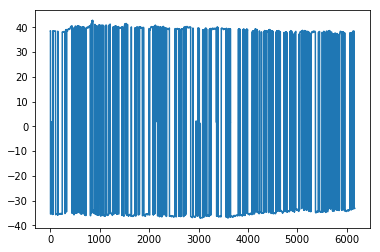

In [151]:
pre.lineer()

## Devamını yetiştiremedim hocam kusura bakmayın.. Bilgisayarım çok yavaş. Geri kalan aşamalarda da aynı şekilde yapıp en son karşılaştırma grafiği koyacaktım..

In [252]:
pre.dummies()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,20_target,50_target,90_target,ind_10,ind_102,ind_109,ind_109_GREEN,ind_109_RED,ind_116,ind_118,...,ind_70,ind_71,ind_74,ind_77,ind_8,ind_82,ind_83,ind_88,ind_9,ind_92
0,15.135802,35.625252,36.997753,14.285714,41.915016,GREEN,NaN,NaN,-13.0,0.002523,...,-3.0,8.0,8.0,8.0,100.0,-2.0,8.0,0.000517,85.714286,20.198253
1,15.143348,35.643013,37.016198,21.428571,44.895122,GREEN,NaN,NaN,-16.0,0.003019,...,-3.0,8.0,8.0,8.0,100.0,-2.0,8.0,0.000401,78.571429,17.870633
2,15.146870,35.651301,-37.024805,28.571429,45.087799,GREEN,NaN,NaN,-15.0,0.003353,...,-4.0,8.0,8.0,8.0,100.0,-2.0,8.0,0.000392,71.428571,12.436570


In [253]:
pre.onhazirlik()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_406,ind_407,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-44,-23,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-48,-16,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-48,-10,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040


In [254]:
pre.train_test_split()

 TRAIN PCR RMSE:36.54105190567187
 TEST PCR RMSE:36.577926175764475


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:114: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by the scale function.

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:115: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by the scale function.



array([37.83, 50.2 , 55.78, 60.35])

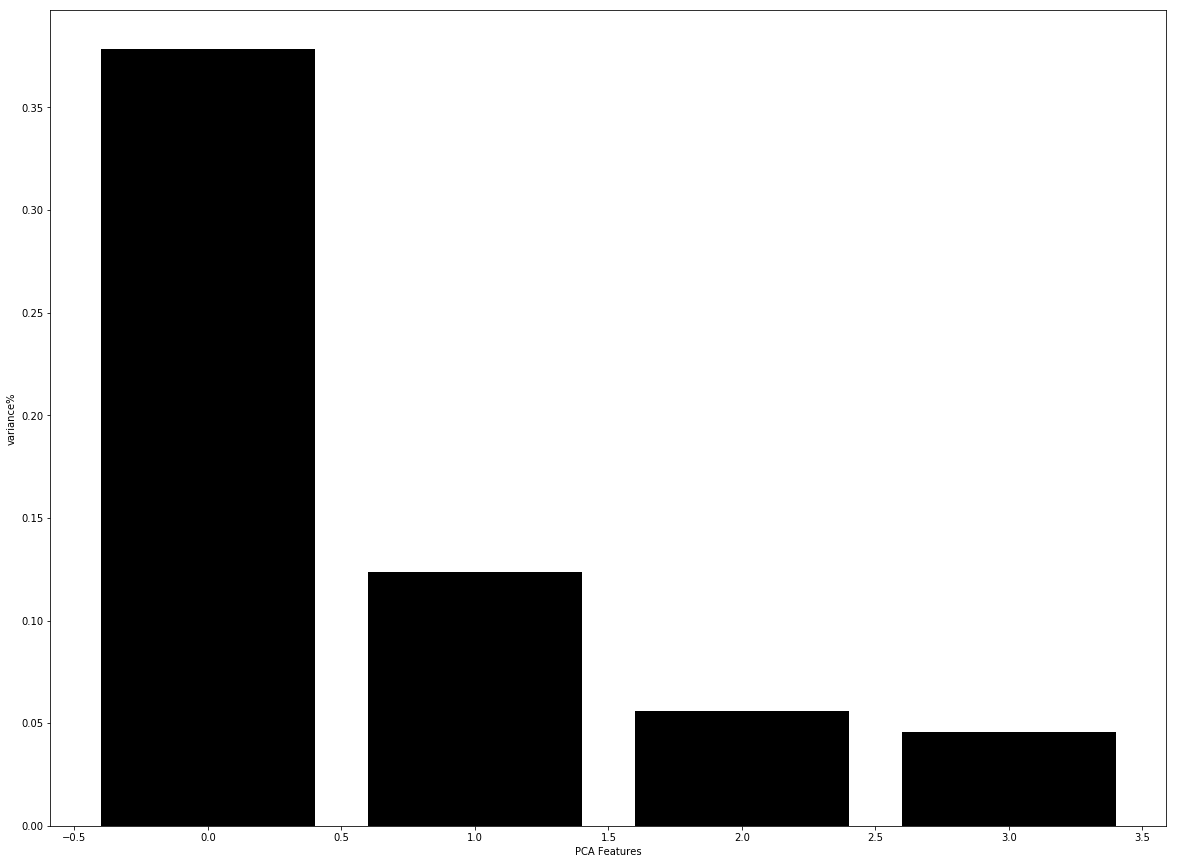

In [255]:
pre.pca()

Leverag v.s. Studentized Residuals
rmse:36.70533356557194


,coef,std err,t,P>|t|,[0.025,0.975]
x1,-0.2662,0.075,-3.544,0.000,-0.413,-0.119
x2,0.4230,0.131,3.219,0.001,0.165,0.681
x3,1.0686,0.185,5.789,0.000,0.707,1.431
x4,1.1372,0.217,5.235,0.000,0.711,1.563


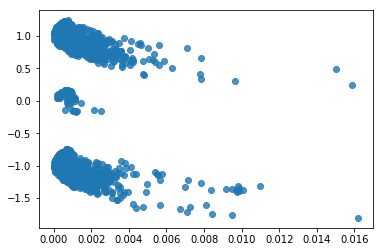

In [156]:
pre.multi_lineer()

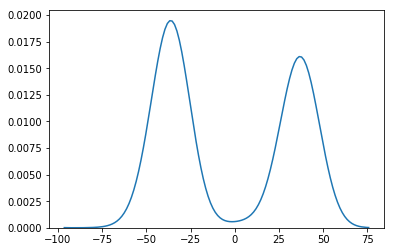

In [157]:
pre.error_test()

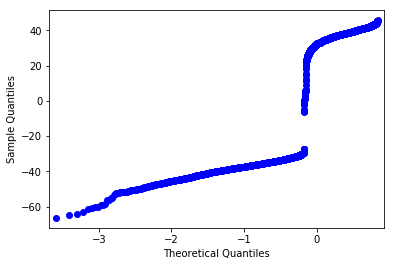

In [158]:
pre.qqplot_error()

# SVR

In [184]:
pre.SVR()

SVR RMSE:41.53482347537331


# TUNING SVR

In [185]:
pre.ModelTuningSVR()

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   15.5s finished


En iyi parametreler: {'C': 1.8000000000000003}
 TUNED SVR RMSE:41.53171365765485


# RBF

In [200]:
pre.RBF()

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



RBF RMSE:46.90794233749574


In [215]:
pre.ModelTuningRBF()

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.3s finished
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



En iyi parametreler: {'C': 15}


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



 TUNED RBF RMSE:39.165198218675975


# MLP

In [216]:
pre.MLPR()

MLPR RMSE:36.245705686542976


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [218]:
pre.ModelTuning_MLPR()

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 11.6min finished
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



En iyi parametreler: {'activation': 'logistic', 'alpha': 0.005, 'hidden_layer_sizes': (300, 200, 150)}
 TUNED MLP RMSE:36.26573950175658


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



# GRADIENT BOOSTING

In [256]:
pre.gradientboost()

GBM RMSE:36.47939115016496


In [257]:
pre.ModelTuning_gradientboost()

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.0s
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  5.8min finished


En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}
 TUNED GBM RMSE:36.14821904014584


# KNN

In [220]:
pre.KNN()

n_neighbors:5
effective_metric:euclidean
KNN RMSE:37.709788312272515


In [221]:
pre.ModelTuning_KNN()

Fitting 3 folds for each of 29 candidates, totalling 87 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KNN TUNED RMSE:36.02897491847671


[Parallel(n_jobs=-1)]: Done  87 out of  87 | elapsed:    2.1s finished


# MODEL KARŞILAŞTIRMA 

In [258]:
rmse = ["36.92967855102184","36.70533356557194","36.57790995574825","41.53482347537331","41.53171365765485","46.90794233749574",
        "39.165198218675975","36.245705686542976","36.26573950175658","36.43092150625677","36.14821904014584","37.709788312272515","36.02897491847671"]

In [259]:
labels=["Lineer", "Multi Lineer", "PCR","SVR", "Tuned SVR", "RBF","TUNED RBF","MLPR","TUNED MLPR","GBM","TUNED GBM","KNN","TUNED KNN"]

In [260]:
def enable_plotly_in_cell():
    import IPython
    from plotly.offline import init_notebook_mode
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=True)
    plotly.offline.init_notebook_mode(connected=True)

from plotly.offline import iplot
import plotly.graph_objs as go



trace1 = go.Scatter(
                    x = labels,
                    y = rmse,
                    mode = "lines",
                    name = "RMSE",
                    marker = dict(color = 'rgba(255, 0, 0, 0.7)')
)

trace2 =go.Scatter( 
                    x = labels,
                    y = rmse,
                    mode = "markers",
                    name = "Highlight Point",
                    marker = dict(color = 'rgba(0, 255, 155, 1)')
)

data = [trace1,trace2]
layout = dict(title = 'RMSE KARŞILAŞTIRMASI',
              xaxis= dict(title= 'RMSE',ticklen= 10,zeroline= False),
              yaxis= dict(title= 'Result',ticklen= 10,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

### Hocam bu notebook multi lineer'e kadardı. Yani class'lar tamdı ama ben multi_lineer fonksiyonuna kadar çalıştırıp öyle yüklemiştim yetiştiremediğim için.Yarım bırakmamak adına tamamladım ve güncelledim.

### Biraz geç güncellediğim için kabul etmezseniz class'larım tamdı ve multi lineer'e kadar kodlarımı çalıştırmıştım hocam.

### Saygılarımla